In [1]:
import matplotlib.pyplot as plt
plt.style.use('thesis')
import numpy as np

# For this notebook, we make the plots a bit smaller.
plt.rcParams['figure.dpi'] = 80
plt.rcParams['figure.figsize'] = [4,2.5]

In [5]:
%%javascript //I want to highlight the comments a little
var styleElement = document.createElement('style');  styleElement.appendChild(document.createTextNode('div.text_cell_render {color:black; background:#ddd; }')); document.getElementsByTagName('head')[0].appendChild(styleElement);

<IPython.core.display.Javascript object>

# Colorplots and floating colorbars

## Colorplots
There are different ways of making a colorplot, all with their own advantages and disadvantages. To get an overview, we create some data:

In [3]:
x = np.arange(0,4)
y = np.arange(2,10.1,2)
data = np.outer(y,x)
print(data)

[[ 0.  2.  4.  6.]
 [ 0.  4.  8. 12.]
 [ 0.  6. 12. 18.]
 [ 0.  8. 16. 24.]
 [ 0. 10. 20. 30.]]


Typically, we would like to have an output in the following form:

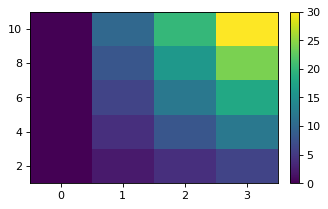

In [4]:
the_mägic()

### `plt.contourf`
This creates a contour plot, where a number of height lines are created and the area inbetween is filled. This typically does not represent the data we take since it discretizes the *z* values and smoothens out *x* and *y*.
So please do not use `plt.contourf` except you are really sure that you want this.

In very rare cases, `plt.tricontourf` can be helpful to display data where the *x* and *y* data are not on a grid.

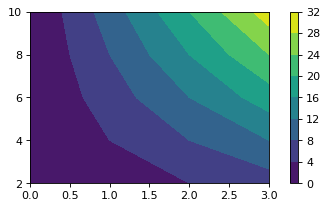

In [5]:
plt.contourf(x,y,data)
plt.colorbar()

### `plt.imshow`
This function is basically intended to show an image, where you provide the individual pixel values. This is very fast, but has some drawbacks: 

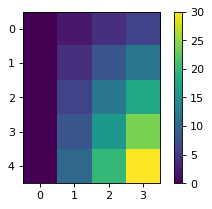

In [6]:
plt.imshow(data)
plt.colorbar()

**Issues with imshow:**
 * Since pixels are intent to be squares, the aspect ratio of your graph will be the aspect of your data, unless you set `aspect="auto"`.
 * The origin is in the top left corner, unless you set `origin="lower"`
 * There is no way to provide *x* and *y* data, you have to set the limits of the axes manually with `extent=(left, right, bottom, top)`. 

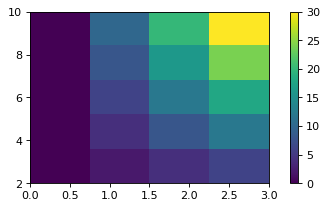

In [7]:
plt.imshow(data,aspect="auto",origin="lower",extent=(min(x),max(x),min(y),max(y)))
plt.colorbar()

Quite obviously, the labels for the *x* axis do not match the data. Please take a second and find out yourself, why this is the case.

### `plt.pcolormesh` (or `plt.pcolor`)
These two functions can be used to plot data on a regular grid. `pcolormesh` is much faster and should almost always be preferred (see [a comparison of the two](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.pcolormesh.html#differences-pcolor-pcolormesh)). The following discussion applies to both functions.
The functionality should be quite obvious and please have a look at [the documentation](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.pcolormesh.html) for further information about things like colormaps and so on. If you export your images as vector files (i.e. `.pdf` or `.svg`), you should for larger datasets use the option `rasterized=True`, which renders the colorplot (but not the axes) as image. Otherwise, every data point is stored as vector object with position, size, background color, frame, ...., which will be really annoying for your PDF reader.

However, there is **one major issue** with these functions: `pcolormesh` was intended to fill the area between adjacent data points with the given color. Since you need a start and end point, your *x* and *y* vectors have to be one larger than the *z* vector, i.e. `z.shape = (i,j); x.shape = (j+1); y.shape = (i+1)`. If they are the same size, matplotlib (for versions < 3.3) just *cuts of the last column/row*!

Luckily, the behavior changed after 3.3, and now it centers each data point and does exactly what we want it to do :)

So please look at the differences in the plots and consider updating `matplotlib` to a more recent version.

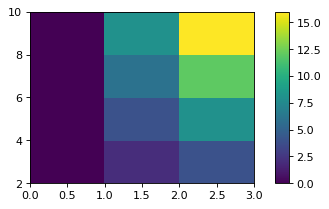

In [8]:
# for matplotlib < 3.3
plt.pcolormesh(x,y,data,rasterized=True) # use rasterized=True for vector exports
plt.colorbar()

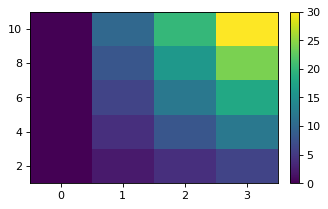

In [9]:
# for matplotlib > 3.3
plt.pcolormesh(x,y,data,rasterized=True)
plt.colorbar()

Find out your version of matplotlib here:

In [10]:
plt.matplotlib.__version__

'3.5.0'

# Floating colorbars
Having the colorbar on the side of the image is often fine, but sometimes you want more control, or you need the colorbar just for the sake of completeness (e.g. for the dispersive of qubits). Then it's sometimes useful to have a floating colorbar, which you place wherever you want. Of course, there is a lot of formatting possible to increase the visibility and the contrast to your data.

For this, you first define a new *axis*, i.e. a plotting window on your current figure by `fig.add_axes([x_pos,y_pos,x_width,y_width])` where the values are in the interval `[0,1]`, relative to the whole figure. The you tell the code to plot the colorbar by `fig.colorbar(the_pcolormesh_item, cax=the_new_axis)`.

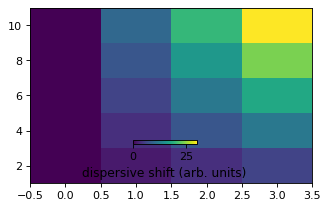

In [11]:
fig = plt.figure()
pcmesh = plt.pcolormesh(x,y,data)

cax = fig.add_axes([0.4,.3,.2,.02]) #define where your colorbar is located and how large it is (in 0...1 values)
cb = fig.colorbar(pcmesh, cax=cax, orientation="horizontal") #Add the colorbar for the plot pcmesh on the axis cax
cb.set_label('dispersive shift (arb. units)')

Of course, this is barely visible, so we set the color to white

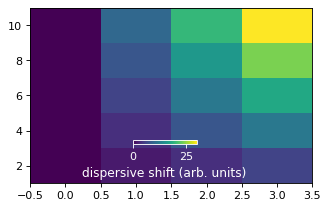

In [12]:
fig = plt.figure()
pcmesh = plt.pcolormesh(x,y,data)
cax = fig.add_axes([0.4,.3,.2,.02])
cb = fig.colorbar(pcmesh, cax=cax, orientation="horizontal")

cb.set_label('dispersive shift (arb. units)',color='w') # color for the label...
plt.setp(plt.getp(cax.axes, 'xticklabels'), color='w') # ...for the numbers...
cax.xaxis.set_tick_params(color='w') # ...for the ticks...
cb.outline.set_edgecolor('w') # ... and for the frame of the colorbar

If the data is not that uniform, you may need to add a background to your label. If you need ticks and labels, it is probably easier to draw and align a rectangle around your whole colorbar area, but if you only need the bar and a description (as you might need for the dispersive shift of qubits), it's really easy:

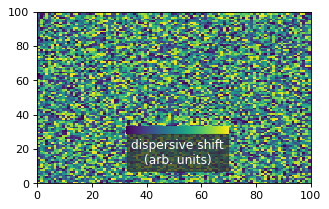

In [13]:
fig = plt.figure()
pcmesh = plt.pcolormesh(np.random.rand(100,100))
cax = fig.add_axes([0.38,.35,.32,.04])
cb = fig.colorbar(pcmesh, cax=cax, orientation="horizontal")
cb.set_ticks([]) # remove ticks
cb.outline.set_visible(False) # remove the frame from the colorbar
cb.set_label('dispersive shift\n(arb. units)',color='w',backgroundcolor=(.2,.2,.2,.7)) # .7 in the color is the transparency (alpha)